In [1]:
# Import that good good
import sys
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import math
from IPython.display import display
from collections import OrderedDict
pd.options.display.max_rows = 2
import matplotlib.colors as mc
import colorsys
import matplotlib.font_manager as font_manager
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.lines import Line2D
import math
# Figure dimensions (inches)
# 2 x 1.8

In [2]:
#Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

In [3]:
# Functions will all go here
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)

def doSort(arr):
    for i in xrange(len(arr)):
        for j in xrange(len(arr)):
            if arr[i] < arr[j] and i > j:
                tmp = arr[i]
                arr[i] = arr[j]
                arr[j] = tmp
                
def slowSort(array):
    """Sort an array the slow (but certain) way"""
    cpy = np.copy(array)
    ind = np.arange(0, len(array))
    for i in xrange(len(cpy)):
        for j in xrange(len(cpy)):
            if cpy[i] > cpy[j] and i < j:
                # Swap the copy array values
                tmp = cpy[i]
                cpy[i] = cpy[j]
                cpy[j] = tmp
                # Swap the corresponding indices
                tmp = ind[i]
                ind[i] = ind[j]
                ind[j] = tmp
    return ind

def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy1 array values
                tmp = cpy1[i]
                cpy1[i] = cpy1[j]
                cpy1[j] = tmp
                # Swap copy2 array values
                tmp = cpy2[i]
                cpy2[i] = cpy2[j]
                cpy2[j] = tmp
                # Swap copy3 array values
                tmp = cpy3[i]
                cpy3[i] = cpy3[j]
                cpy3[j] = tmp
                # Swap the corresponding indices
                tmp = ind[i]
                ind[i] = ind[j]
                ind[j] = tmp
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy1 array values
                tmp = cpy1[i]
                cpy1[i] = cpy1[j]
                cpy1[j] = tmp
                # Swap copy2 array values
                tmp = cpy2[i]
                cpy2[i] = cpy2[j]
                cpy2[j] = tmp
                # Swap copy3 array values
                tmp = cpy3[i]
                cpy3[i] = cpy3[j]
                cpy3[j] = tmp
                # Swap the corresponding indices
                tmp = ind[i]
                ind[i] = ind[j]
                ind[j] = tmp
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy1 array values
                tmp = cpy1[i]
                cpy1[i] = cpy1[j]
                cpy1[j] = tmp
                # Swap copy2 array values
                tmp = cpy2[i]
                cpy2[i] = cpy2[j]
                cpy2[j] = tmp
                # Swap copy3 array values
                tmp = cpy3[i]
                cpy3[i] = cpy3[j]
                cpy3[j] = tmp
                # Swap the corresponding indices
                tmp = ind[i]
                ind[i] = ind[j]
                ind[j] = tmp
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]
            
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# This will find my installation of whingdingdilly wherever it is installed
def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)
        
def computeTauPerTstep(epsilon):
    sigma = 1.0
    threeEtaPiSigma = 1.0
    runFor = 200
    tauBrown = 1.0
    
    tauLJ = ((sigma**2) * threeEtaPiSigma) / epsilon
    dt = 0.00001 * tauLJ
    simLength = runFor * tauBrown
    totTsteps = int(simLength / dt)
    tstepPerTau = int(totTsteps / float(simLength))
    return tstepPerTau

def linearRel(m, x, b):
    return b * (x**m)
  
def loglogStraight(x, a, b):
    return a * (x**b)

def plotFit(xdata, ydata):
    popt, pcov = curve_fit(loglogStraight, xdata, ydata)
    plt.loglog(xdata, loglogStraight(xdata, *popt),
               label='fit PeR=' + str(params['peR'][i]) + ': b=%5.3f' % (popt[1]))
    
myCols1 = ['#1A1334',
          '#26284A',
          '#01545B',
          '#017351',
          '#02C383',
          '#AAD962',
          '#FABF45',
          '#EF6A32',
          '#ED0245',
          '#A1295E',
          '#700161']
myCols = ['#26284A',
          '#01545B',
          '#017351',
          '#02C383',
          '#AAD962',
          '#FABF45',
          '#EF6A32',
          '#ED0245',
          '#A1295E',
          '#700161']
def getCol(peR):
    index = int(peR * 10) - 1
    return myCols[index]

myShps = ['o',
          '^',
          's',
          'D',
          'P',
          'X',
          '*',
          '<']
def getShp(xA):
    index = int(xA / 10)
    return myShps[index]

def theoryDenom(xS, peS, peF):
    xS /= 100.0
    xF = 1.0 - xS
    return 4.0 * ((xS * peS) + (xF * peF))

In [4]:
# Get the relevant paths
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
constPath = ipyPath + '/constant_ratio'
dataPath = constPath + '/constRatTxt_02_07_19'

# Go to the correct parent directory
os.chdir(constPath)
txtFiles = os.listdir(dataPath)
numFiles = len(txtFiles)
all_sims = []

In [5]:
# You want to load the data in so that it's sorted to begin with
paList = []
pbList = []
perList = []
xaList = []
for i in xrange(numFiles):
    paList.append(getFromTxt(txtFiles[i], "pa", "_pb"))
    pbList.append(getFromTxt(txtFiles[i], "pb", "_xa"))
    xaList.append(getFromTxt(txtFiles[i], "xa", "_ep"))
    perList.append(round(paList[i]/pbList[i], 1))
    
# Now sort the array of txtFile names
indArr = multiSort(perList, paList, xaList)
indSort(txtFiles, indArr)

In [6]:
# Using the absolute path means I can go to whatever directory I want
os.chdir(dataPath)
for i in xrange(numFiles):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)
    
# Return to root directory
os.chdir(constPath)

In [7]:
# Check to see if timesteps are in order
for i in xrange(numFiles):
    myBool = chkSort(all_sims[i]['Timestep'])
    if myBool is False:
        print("Source files are not chronilogically sorted!")
        exit(1)
    else:
        print("{} sorted... ").format(txtFiles[i])

diam_pa10_pb100_xa50_ep18.txt sorted... 
diam_pa20_pb200_xa50_ep34.txt sorted... 
diam_pa30_pb300_xa50_ep50.txt sorted... 
diam_pa40_pb400_xa50_ep66.txt sorted... 
diam_pa50_pb500_xa50_ep82.txt sorted... 
diam_pa60_pb600_xa50_ep98.txt sorted... 
diam_pa70_pb700_xa50_ep114.txt sorted... 
diam_pa80_pb800_xa50_ep130.txt sorted... 
diam_pa90_pb900_xa50_ep146.txt sorted... 
diam_pa100_pb1000_xa50_ep162.txt sorted... 
diam_pa110_pb1100_xa50_ep178.txt sorted... 
diam_pa120_pb1200_xa50_ep194.txt sorted... 
diam_pa130_pb1300_xa50_ep210.txt sorted... 
diam_pa140_pb1400_xa50_ep226.txt sorted... 
diam_pa150_pb1500_xa50_ep242.txt sorted... 
diam_pa10_pb33_xa30_ep7.txt sorted... 
diam_pa10_pb33_xa50_ep7.txt sorted... 
diam_pa10_pb33_xa70_ep7.txt sorted... 
diam_pa20_pb66_xa30_ep12.txt sorted... 
diam_pa20_pb66_xa50_ep12.txt sorted... 
diam_pa20_pb66_xa70_ep12.txt sorted... 
diam_pa30_pb100_xa30_ep18.txt sorted... 
diam_pa30_pb100_xa50_ep18.txt sorted... 
diam_pa30_pb100_xa70_ep18.txt sorted... 
diam

In [8]:
# Add a column to the all_sims dataframe for number of clusters (of threshold size):
for i in xrange(numFiles):
    # New column for number of clusters
    all_sims[i]['nClust'] = all_sims[i]['Dense_tot'] / all_sims[i]['MCS']
    # Ger rid of NaN in favor of 0
    all_sims[i].fillna(0, inplace=True)

display(all_sims[0])

Timestep  Gas_A  Gas_B  Gas_tot  Dense_A  Dense_B  Dense_tot  Lc_numA  \
0           0.0  25000  25000    50000        0        0          0        4   
..          ...    ...    ...      ...      ...      ...        ...      ...   
550  89100000.0  15926  12128    28054     9074    12872      21946     3808   

     Lc_numB  Lg_clust    ...      sigAA   sigAB   sigBB  phiEff  lg_clustA  \
0          1         5    ...     1.0009  1.0023  1.0027     0.6        3.9   
..       ...       ...    ...        ...     ...     ...     ...        ...   
550     5677      9485    ...     1.0016  1.0006  1.0010     0.6     7468.0   

     tot_clustA  LC_density  DP_density  GP_density    nClust  
0           0.0        1.27        0.00        0.76  0.000000  
..          ...         ...         ...         ...       ...  
550     17279.4        1.27        1.27        0.58  4.000365  

[551 rows x 22 columns]

In [9]:
# Make an additional frame that gives total number of particles, and simulation parameters
paramList = []
for i in xrange(numFiles):
    partAll = all_sims[i]['Gas_tot'][0]
    partA = all_sims[i]['Gas_A'][0]
    partB = all_sims[i]['Gas_B'][0]
    pa = getFromTxt(txtFiles[i], "pa", "_pb")
    pb = getFromTxt(txtFiles[i], "pb", "_xa")
    xa = getFromTxt(txtFiles[i], "xa", "_ep")
    ep = getFromTxt(txtFiles[i], "ep", ".txt")
    converT = computeTauPerTstep(ep)
    
    try:
        # Round to the nearest tenths place
        prat = round(float(pa)/float(pb), 1)
    except:
        prat = 0.0
    paramList.append((partAll, partA, partB, pa, pb, xa, prat, ep, converT))

params = pd.DataFrame(paramList, columns=['partAll', 'partA', 'partB', 'peA', 'peB', 'xA', 'peR', 'eps', 'brownTime'])
display(params)

distPeR = []
for i in xrange(numFiles):
    if params['peR'][i] not in distPeR:
        distPeR.append(params['peR'][i])
doSort(distPeR)
print(distPeR)

distxA = []
for i in xrange(numFiles):
    if params['xA'][i] not in distxA:
        distxA.append(params['xA'][i])
doSort(distxA)
print(distxA)

partAll  partA  partB    peA    peB    xA  peR   eps  brownTime
0      50000  25000  25000   10.0  100.0  50.0  0.1  18.0    1800000
..       ...    ...    ...    ...    ...   ...  ...   ...        ...
163    50000  25000  25000  150.0  166.0  50.0  0.9  28.0    2800000

[164 rows x 9 columns]

[0.1, 0.3, 0.5, 0.7, 0.9]
[30.0, 50.0, 70.0]


Gas_A    Gas_B  Gas_tot  Dense_A  Dense_B Dense_tot  Lc_numA  Lc_numB  \
0    60.8405  46.8716   53.856  39.1595  53.1284    46.144  17.4429  23.3098   
..       ...      ...      ...      ...      ...       ...      ...      ...   
163  8.70596  8.01902  8.36249   91.294   91.981   91.6375  88.3562  89.0392   

    Lg_clust      MCS   ...       sigAA    sigAB    sigBB phiEff lg_clustA  \
0    20.3764  11.8277   ...     1.00123  1.00097  1.00099    0.6   8019.35   
..       ...      ...   ...         ...      ...      ...    ...       ...   
163  88.6977  81.7492   ...     1.00035  1.00037  1.00032    0.6   34854.8   

    tot_clustA LC_density DP_density GP_density   nClust  
0      18160.2       1.27       1.27   0.569796  4.22483  
..         ...        ...        ...        ...      ...  
163    36010.1       1.27       1.27   0.142041   1.2449  

[164 rows x 21 columns]

Gas_A     Gas_B   Gas_tot   Dense_A   Dense_B Dense_tot  Lc_numA  \
0     1.63916   2.46481   1.96535   1.63916   2.46481   1.96535  5.03664   
..        ...       ...       ...       ...       ...       ...      ...   
163  0.672999  0.639998  0.644085  0.672999  0.639998  0.644085  6.55954   

     Lc_numB Lg_clust      MCS    ...           sigAA        sigAB  \
0    6.60939  5.79489  3.58572    ...     0.000625895  0.000669207   
..       ...      ...      ...    ...             ...          ...   
163  6.58072  6.56895  20.1169    ...     0.000352311  0.000311383   

           sigBB       phiEff lg_clustA tot_clustA   LC_density   DP_density  \
0     0.00063181  5.55112e-16   2281.51    775.194  1.33227e-15  1.33227e-15   
..           ...          ...       ...        ...          ...          ...   
163  0.000338468  5.55112e-16   2580.01    252.645  1.33227e-15  1.33227e-15   

     GP_density    nClust  
0     0.0111556   1.16544  
..          ...       ...  
163  0.00989322  0.516303  

[164 rows x 21 columns]

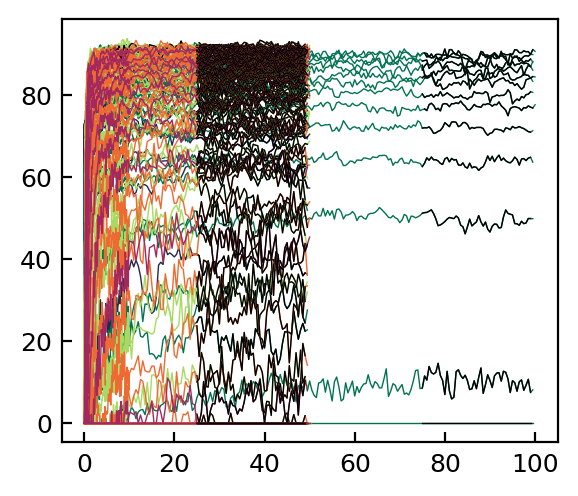

In [10]:
# How many frames to average over for steady-state
avgOver = 50

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
for i in range(0, len(txtFiles)):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)

# Make dataframe of steady-state data
for i in range(0, len(txtFiles)):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(headers) + 1):
        # Compute mean of last 100 entries in jth column of ith file
        avg = np.mean(all_sims[i].iloc[-avgOver:-1,j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation in this data
        stdError = np.std(all_sims[i].iloc[-avgOver:-1,j])
        stdErr[headers[j-1]][i] = stdError
        
# Normalize by number of particles
for i in xrange(len(txtFiles)):
    if params['partA'][i] != 0:
        SS['Gas_A'][i] /= params['partA'][i]
        SS['Dense_A'][i] /= params['partA'][i]
        SS['Lc_numA'][i] /= params['partA'][i]
        stdErr['Gas_A'][i] /= params['partA'][i]
        stdErr['Dense_A'][i] /= params['partA'][i]
        stdErr['Lc_numA'][i] /= params['partA'][i]
        
    if params['partB'][i] != 0:
        SS['Gas_B'][i] /= params['partB'][i]
        SS['Dense_B'][i] /= params['partB'][i]
        SS['Lc_numB'][i] /= params['partB'][i]
        stdErr['Gas_B'][i] /= params['partB'][i]
        stdErr['Dense_B'][i] /= params['partB'][i]
        stdErr['Lc_numB'][i] /= params['partB'][i]

SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]
stdErr['Gas_tot'][:] /= params['partAll'][:]
stdErr['Dense_tot'][:] /= params['partAll'][:] 
stdErr['Lg_clust'][:] /= params['partAll'][:] 
stdErr['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lc_numA'][:] *= 100.0
SS['Lc_numB'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
stdErr['Gas_A'][:] *= 100.0
stdErr['Gas_B'][:] *= 100.0
stdErr['Gas_tot'][:] *= 100.0
stdErr['Dense_A'][:] *= 100.0
stdErr['Dense_B'][:] *= 100.0
stdErr['Dense_tot'][:] *= 100.0
stdErr['Lc_numA'][:] *= 100.0
stdErr['Lc_numB'][:] *= 100.0
stdErr['Lg_clust'][:] *= 100.0
stdErr['MCS'][:] *= 100.0
display(SS)
display(stdErr)

# Get an idea for what section of the data we are averaging over
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c=getCol(params['peR'][i]),
             label=str(params['peR'][i]))
    plt.plot(all_sims[i]['Timestep'][-avgOver:-1] / params['brownTime'][i],
             all_sims[i]['Dense_A'][-avgOver:-1] / params['partA'][i] * 100.0,
             c='k')
        
plt.show()

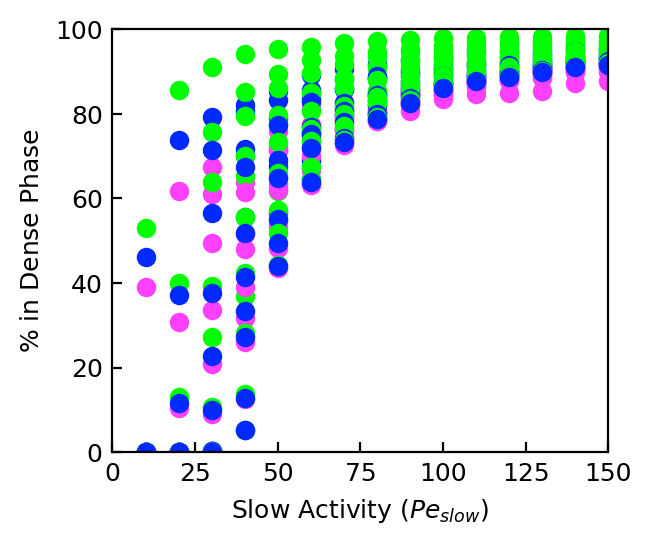

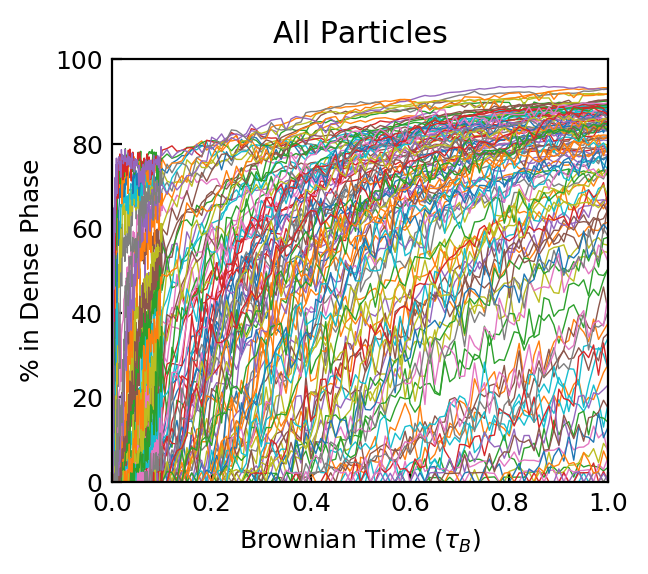

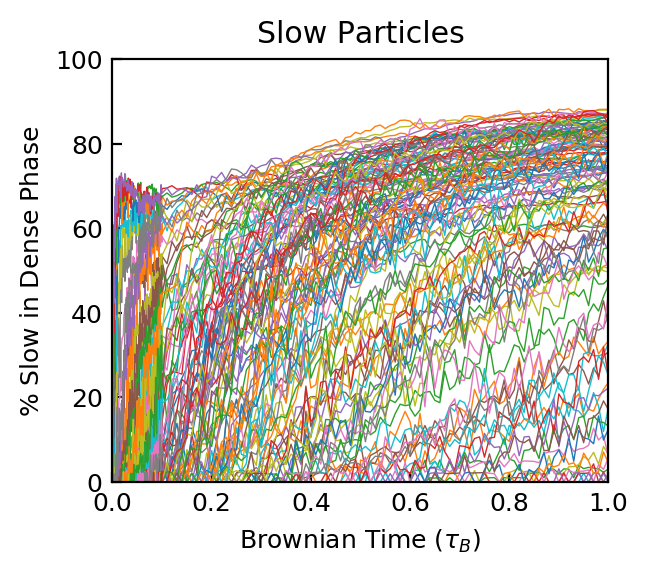

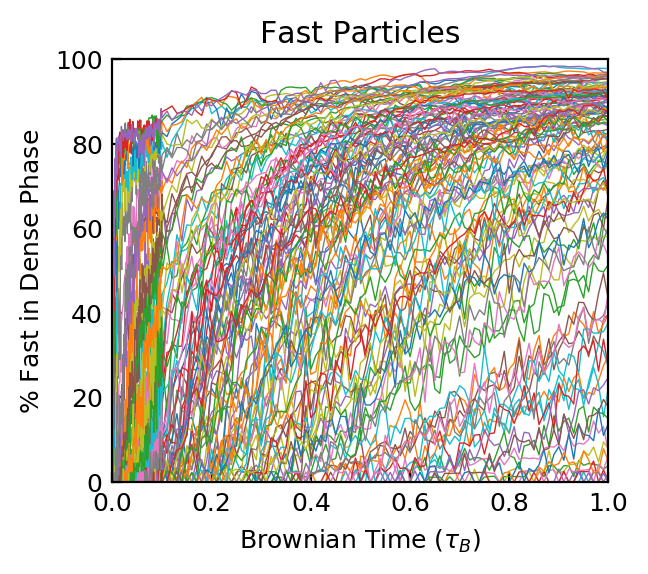

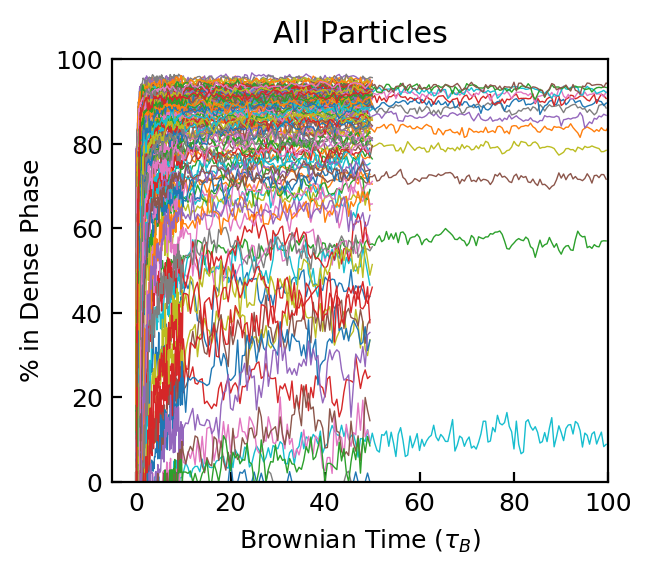

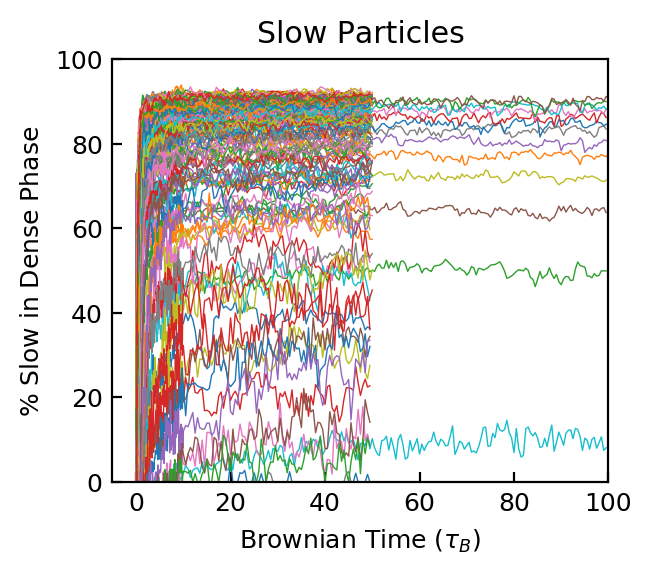

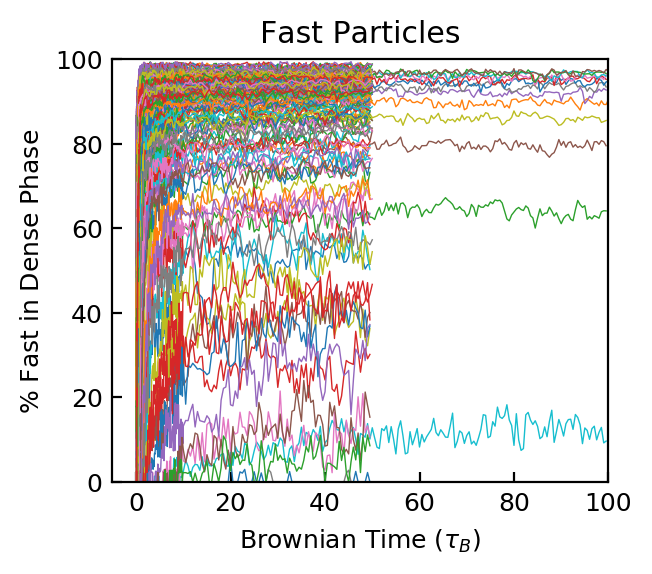

In [11]:
# Let's make plots without the plotter function

################################# Percent in dense phase #####################################
# SS
for i in xrange(numFiles):
    plt.scatter(params['peA'][i], SS['Dense_A'][i], c='#FF40FF', label='Slow')
    plt.scatter(params['peA'][i], SS['Dense_B'][i], c='#00FF00', label='Fast')
    plt.scatter(params['peA'][i], SS['Dense_tot'][i], c='#0029FF', label='All')
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), loc=7)
plt.xlabel(r'Slow Activity $\left( Pe_{slow} \right)$')
plt.xlim(0, 150.0)
plt.ylabel(r'$\%$ in Dense Phase')
plt.ylim(0, 100)
plt.show()
# vs time
# All
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_tot'] * 100.0 / params['partAll'][i],
             label=str(params['peA'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.40, -0.25), title=r'$Pe_{S}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ in Dense Phase')
plt.ylim(0, 100)
plt.title('All Particles')
plt.show()
# A-type
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_A'] * 100.0 / params['partA'][i],
             label=str(params['peA'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.40, -0.25), title=r'$Pe_{S}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ Slow in Dense Phase')
plt.ylim(0, 100)
plt.title('Slow Particles')
plt.show()
# B-type
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_B'] * 100.0 / params['partB'][i],
             label=str(params['peA'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.40, -0.25), title=r'$Pe_{S}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ Fast in Dense Phase')
plt.ylim(0, 100)
plt.title('Fast Particles')
plt.show()

# Now all time
# All
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_tot'] * 100.0 / params['partAll'][i],
             label=str(params['peA'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.40, -0.25), title=r'$Pe_{S}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ in Dense Phase')
plt.ylim(0, 100)
plt.title('All Particles')
plt.show()
# A-type
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_A'] * 100.0 / params['partA'][i],
             label=str(params['peA'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.40, -0.25), title=r'$Pe_{S}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ Slow in Dense Phase')
plt.ylim(0, 100)
plt.title('Slow Particles')
plt.show()
# B-type
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_B'] * 100.0 / params['partB'][i],
             label=str(params['peA'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.40, -0.25), title=r'$Pe_{S}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ Fast in Dense Phase')
plt.ylim(0, 100)
plt.title('Fast Particles')
plt.show()


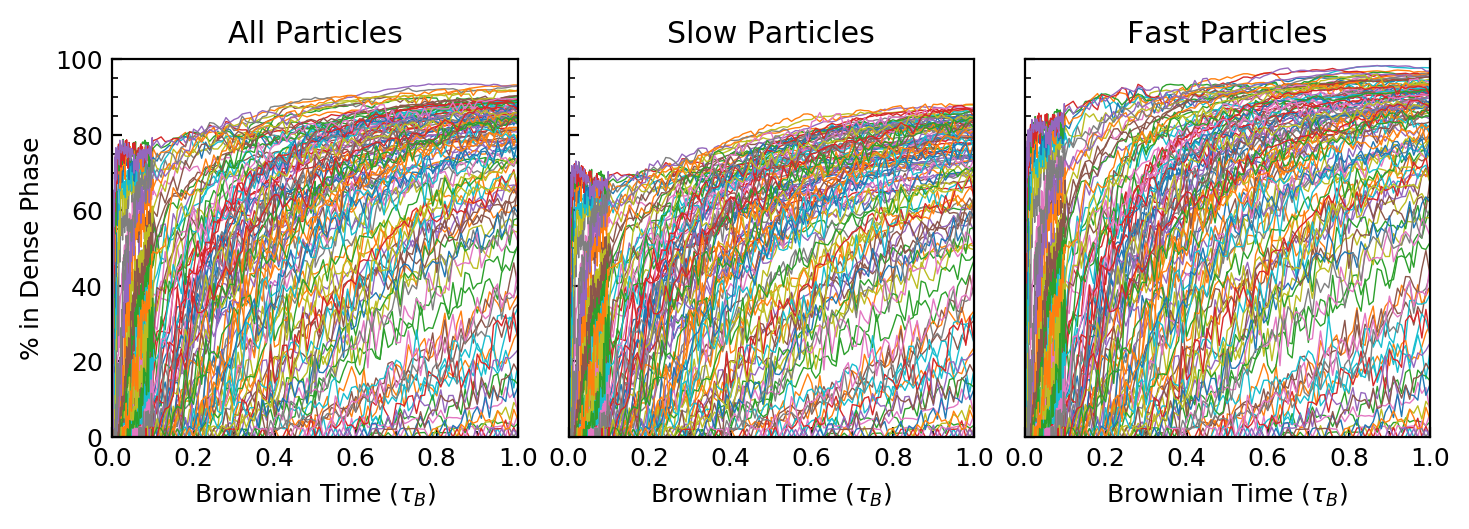

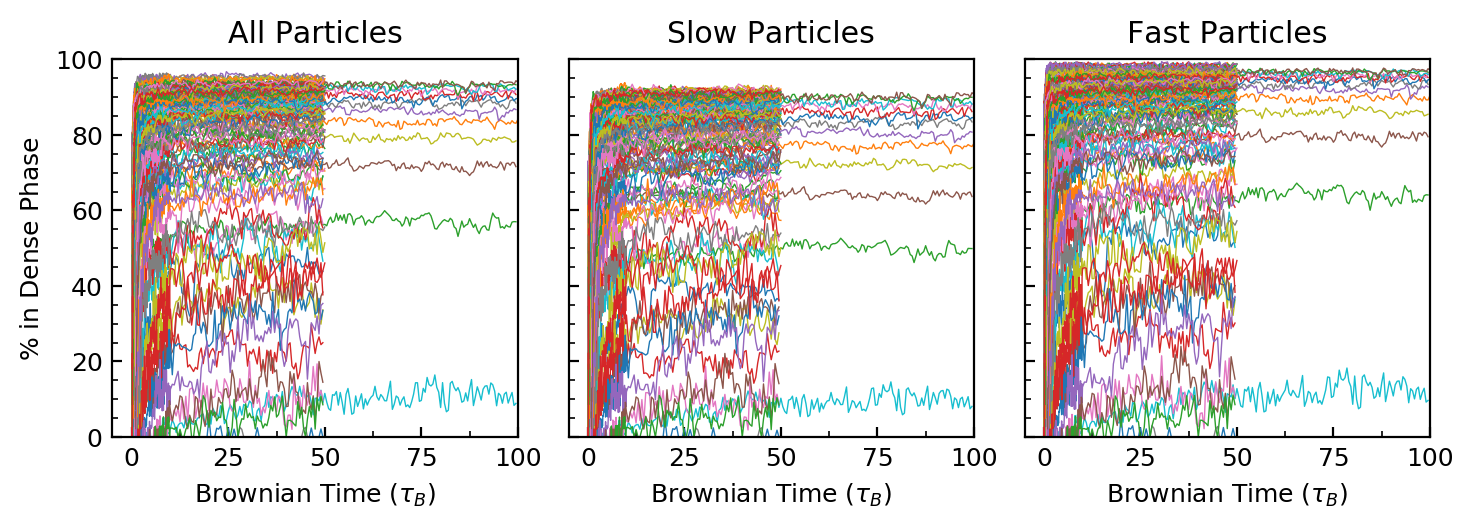

In [12]:
# Time resolved data side-by-side
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8.5,2.5), sharey=True)
for i in xrange(numFiles):
    ax1.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_tot'] * 100.0 / params['partAll'][i],
             label="" + str(params['peA'][i]) + ", " + str(params['peB'][i]))
    ax2.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_A'] * 100.0 / params['partA'][i],
             label=str(params['peA'][i]))
    ax3.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_B'] * 100.0 / params['partB'][i],
             label=str(params['peA'][i]))
# ax1.legend(loc = 4, bbox_to_anchor=(3.95, -0.25), title=r'$Pe_{S}, \ Pe_{F}$')
ax1.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax2.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax3.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax1.set_ylabel(r'$\%$ in Dense Phase')
ax1.set_xlim(0, 1.0)
ax2.set_xlim(0, 1.0)
ax3.set_xlim(0, 1.0)
ax1.set_title('All Particles')
ax2.set_title('Slow Particles')
ax3.set_title('Fast Particles')
plt.ylim(0, 100)
plt.subplots_adjust(wspace = 0.125)
minorLocator = MultipleLocator(0.1)
ax1.xaxis.set_minor_locator(minorLocator)
ax2.xaxis.set_minor_locator(minorLocator)
ax3.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(5)
ax1.yaxis.set_minor_locator(minorLocator)
ax2.yaxis.set_minor_locator(minorLocator)
ax3.yaxis.set_minor_locator(minorLocator)
plt.show()

# Increase the observed time
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8.5,2.5), sharey=True)
for i in xrange(numFiles):
    ax1.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_tot'] * 100.0 / params['partAll'][i],
             label=str(params['peA'][i]))
    ax2.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_A'] * 100.0 / params['partA'][i],
             label=str(params['peA'][i]))
    ax3.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Dense_B'] * 100.0 / params['partB'][i],
             label=str(params['peA'][i]))
# ax1.legend(loc = 4, bbox_to_anchor=(3.75, -0.25), title=r'$Pe_{S}$')
ax1.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax2.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax3.set_xlabel(r'Brownian Time $(\tau_{B})$')
ax1.set_ylabel(r'$\%$ in Dense Phase')
ax1.set_xlim(-5, 100)
ax2.set_xlim(-5, 100)
ax3.set_xlim(-5, 100)
ax1.set_title('All Particles')
ax2.set_title('Slow Particles')
ax3.set_title('Fast Particles')
plt.ylim(0, 100)
plt.subplots_adjust(wspace = 0.125)
minorLocator = MultipleLocator(12.5)
ax1.xaxis.set_minor_locator(minorLocator)
ax2.xaxis.set_minor_locator(minorLocator)
ax3.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(5)
ax1.yaxis.set_minor_locator(minorLocator)
ax2.yaxis.set_minor_locator(minorLocator)
ax3.yaxis.set_minor_locator(minorLocator)
plt.show()


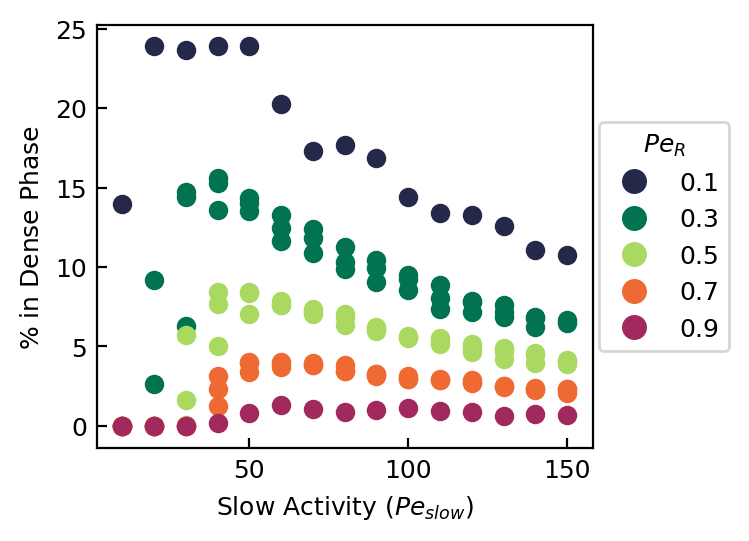

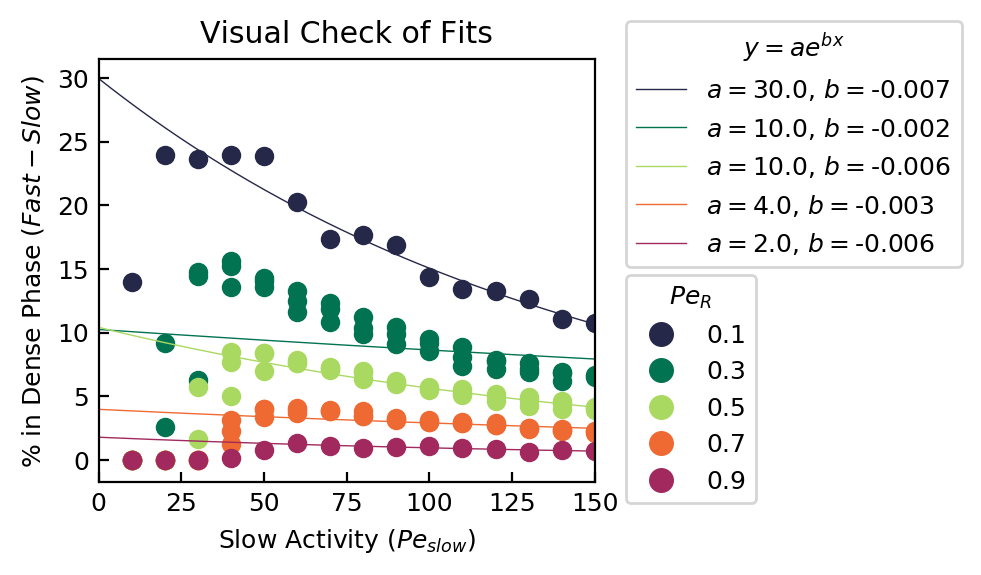

In [13]:
# Let's plot: % fast in dense phase - % slow in dense phase
# (for each magnitude of activity... is it constant?)
diffList = []
logDiff = []
logPeA = []
for i in xrange(numFiles):
    diffList.append(float(SS['Dense_B'][i] - SS['Dense_A'][i]))
    try:
        logDiff.append(math.log(diffList[i]))
    except:
        logDiff.append(0.0)
    logPeA.append(math.log(float(params['peA'][i])))
    
    plt.scatter(params['peA'][i], diffList[i],
                c=getCol(params['peR'][i]),
                label=str(params['peR'][i])
               )
    
mw = 10
# legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[0], markersize=mw, label=r'$0.1$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[1], markersize=mw, label=r'$0.2$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[2], markersize=mw, label=r'$0.3$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[3], markersize=mw, label=r'$0.4$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[4], markersize=mw, label=r'$0.5$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[5], markersize=mw, label=r'$0.6$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[6], markersize=mw, label=r'$0.7$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[7], markersize=mw, label=r'$0.8$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[8], markersize=mw, label=r'$0.9$')
#                   ]
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[0], markersize=mw, label=r'$0.1$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[1], markersize=mw, label=r'$0.2$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[2], markersize=mw, label=r'$0.3$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[3], markersize=mw, label=r'$0.4$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[4], markersize=mw, label=r'$0.5$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[5], markersize=mw, label=r'$0.6$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[6], markersize=mw, label=r'$0.7$'),
#                    Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[7], markersize=mw, label=r'$0.8$'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=myCols[8], markersize=mw, label=r'$0.9$')
                  ]

plt.legend(title=r'$Pe_{R}$', handles=legend_elements, loc = 4, bbox_to_anchor=(1.3, 0.2))

# plt.plot(params['peA'], diffList)
# plt.loglog(logPeA, logDiff)

# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# plt.legend(loc = 4, bbox_to_anchor=(1.60, -0.25), title=r'$Pe_{S}, \ Pe_{F}$')
plt.xlabel(r'Slow Activity $\left( Pe_{slow} \right)$')
# plt.xlim(0, 150.0)
plt.ylabel(r'$\%$ in Dense Phase')
# plt.ylim(0, 20)
plt.show()

# Exponential decay? y = ae^bx --> ln(y) = ln(a) + bx
def myLine(xx, mm, bb): # this is your 'straight line' y=f(x)
    return mm*xx + bb

# Fit exponential decay to each of my activity ratios:
for i in xrange(len(distPeR)):
    fitx = []
    fity = []
    nonLog = []
    for j in xrange(numFiles):
        if params['peR'][j] == distPeR[i]:
            fitx.append(params['peA'][j])
            fity.append(logDiff[j])
            nonLog.append(diffList[j])
            
    # Let's pick the peak in each set of PeR data:
    absDiff = 0.0
    peakInd = 0
    for j in range(1, len(fity) - 1):
        # Take the magnitude of the difference between adjacent points:
        tmp = (fity[j] - fity[j-1]) + (fity[j] - fity[j+1])
        if tmp > absDiff and fity[j-1] < fity[j] and fity[j+1] < fity[j]:
            absDiff = tmp
            peakInd = j
    
    # Now fit the data to exponential decay (to right of peak)
    b, fittmp = curve_fit(myLine, fitx[peakInd:], fity[peakInd:])[0]
    a = math.e ** fittmp
    lna = math.log(a)
#     print("Slope={}, intercept={}").format(b, lna)

#     # Line to examine the fit visually
#     chkLine = []
#     for j in xrange(len(params['peA'])):
#         if params['peR'][j] == distPeR[i]:
#             chkLine.append(myLine(params['peA'][j], b, lna))

#     plt.plot(fitx, fity)
#     plt.plot(fitx, chkLine)
#     plt.xlim(0, 150)
#     plt.show()

    # Now let's plot our line with the original data
    oxs = np.arange(0, 150, 0.001)
    oys = np.zeros_like(oxs)
    for j in xrange(len(oxs)):
        oys[j] = a * math.e ** (b * oxs[j])

    plt.scatter(fitx, nonLog, c=getCol(distPeR[i]))
    plt.plot(oxs, oys, c=getCol(distPeR[i]), label=r'$a=$' + str(round(a)) + ', $b=$' + str(round(b, 3)))
    plt.title(r'Visual Check of Fits')
first_legend = plt.legend(title=r'$y=ae^{bx}$', loc = 4, bbox_to_anchor=(1.765, 0.48))
ax = plt.gca().add_artist(first_legend)
plt.legend(title=r'$Pe_{R}$', handles=legend_elements, loc = 4, bbox_to_anchor=(1.35, -0.08))
plt.xlim(0, 150)
plt.xlabel(r'Slow Activity $\left( Pe_{slow} \right)$')
plt.ylabel(r'$\%$ in Dense Phase $\left( Fast - Slow \right)$')
plt.show()

# When will there be no difference?
# ANSWER: at x = inf... this makes sense the activity ratio is 1 at that point



Text(0.5,1,'$x_{S}=0.7$')

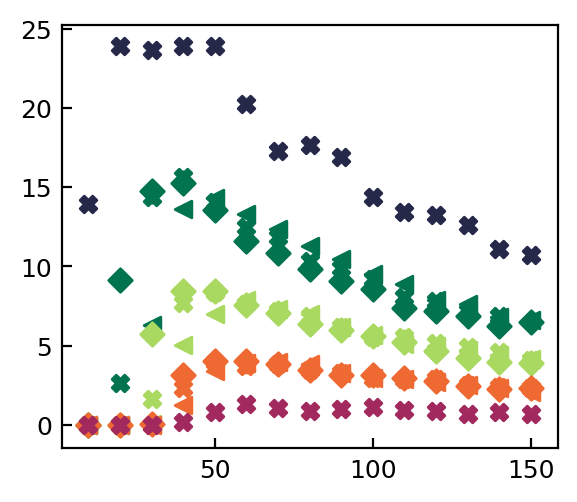

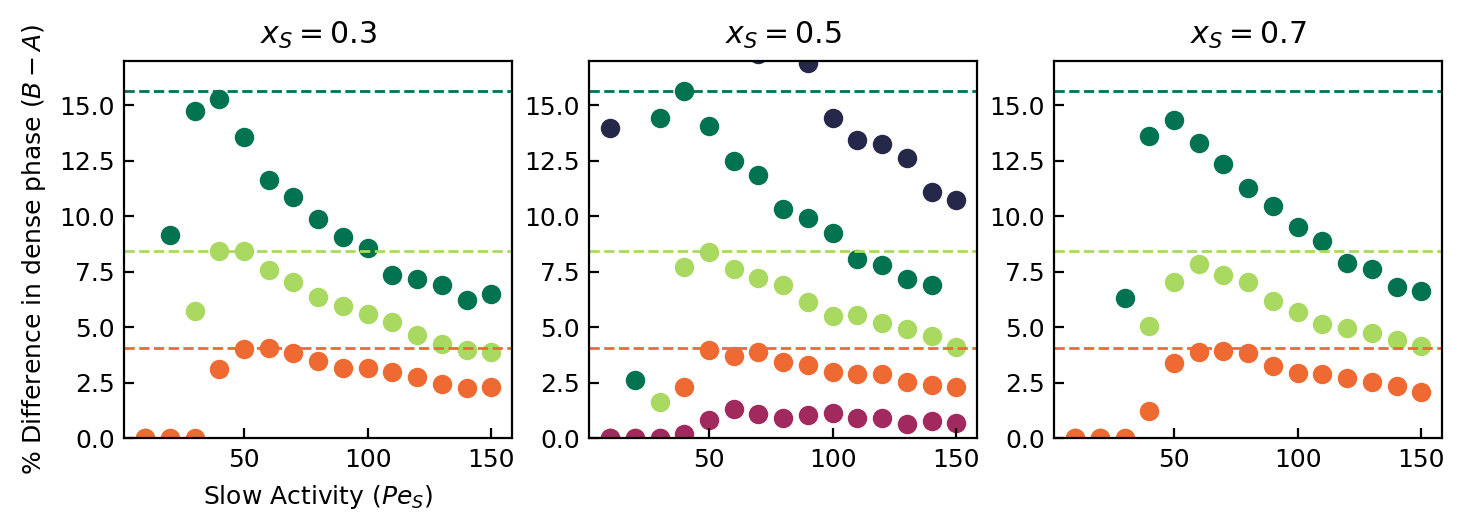

In [14]:
# Let's fix this plot to show effect of xA

# This gives PeR group (color)
for i in xrange(len(distPeR)):
    # This gives xA (shape)
    for j in xrange(len(distxA)):
        # Loop to find all matching files
        for k in xrange(numFiles):
            if params['peR'][k] == distPeR[i] and params['xA'][k] == distxA[j]:
                diff = SS['Dense_B'][k] - SS['Dense_A'][k]
                plt.scatter(params['peA'][k], diff, c=getCol(distPeR[i]), marker=getShp(distxA[j]))
                
# Let's divide this up into three plots so we can see what's happening:

# Make the figure plot like I've drawn up in my notes (4x3)
fig = plt.figure(figsize=(8.5, 2.5))

### First subplots will be PeS = 0 ###
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

max3 = 0.0
max5 = 0.0
max7 = 0.0

# ax1 plot (first fraction)
for i in xrange(numFiles):
    diff = SS['Dense_B'][i] - SS['Dense_A'][i] 
    if distxA[0] == params['xA'][i]:
        ax1.scatter(params['peA'][i], diff, c=getCol(params['peR'][i]))
    if distxA[1] == params['xA'][i]:
        ax2.scatter(params['peA'][i], diff, c=getCol(params['peR'][i]))
    if distxA[2] == params['xA'][i]:
        ax3.scatter(params['peA'][i], diff, c=getCol(params['peR'][i]))
    # Get the max difference for each activity ratio
    if params['peR'][i] == 0.3 and diff > max3:
        max3 = diff
    if params['peR'][i] == 0.5 and diff > max5:
        max5 = diff
    if params['peR'][i] == 0.7 and diff > max7:
        max7 = diff
        
# Add maximum values as horizontal line on each plot:
mylw = 1.0
myls = '--'
ax1.axhline(y=max3, color=getCol(0.3), lw=mylw, linestyle=myls)
ax1.axhline(y=max5, color=getCol(0.5), lw=mylw, linestyle=myls)
ax1.axhline(y=max7, color=getCol(0.7), lw=mylw, linestyle=myls)
ax2.axhline(y=max3, color=getCol(0.3), lw=mylw, linestyle=myls)
ax2.axhline(y=max5, color=getCol(0.5), lw=mylw, linestyle=myls)
ax2.axhline(y=max7, color=getCol(0.7), lw=mylw, linestyle=myls)
ax3.axhline(y=max3, color=getCol(0.3), lw=mylw, linestyle=myls)
ax3.axhline(y=max5, color=getCol(0.5), lw=mylw, linestyle=myls)
ax3.axhline(y=max7, color=getCol(0.7), lw=mylw, linestyle=myls)
        
ax1.set_ylim(0, 17)    
ax2.set_ylim(0, 17)  
ax3.set_ylim(0, 17)  

ax1.set_xlabel(r'Slow Activity $(Pe_{S})$')
ax1.set_ylabel(r'% Difference in dense phase $(B-A)$')
ax1.set_title(r'$x_{S}=0.3$')
ax2.set_title(r'$x_{S}=0.5$')
ax3.set_title(r'$x_{S}=0.7$')

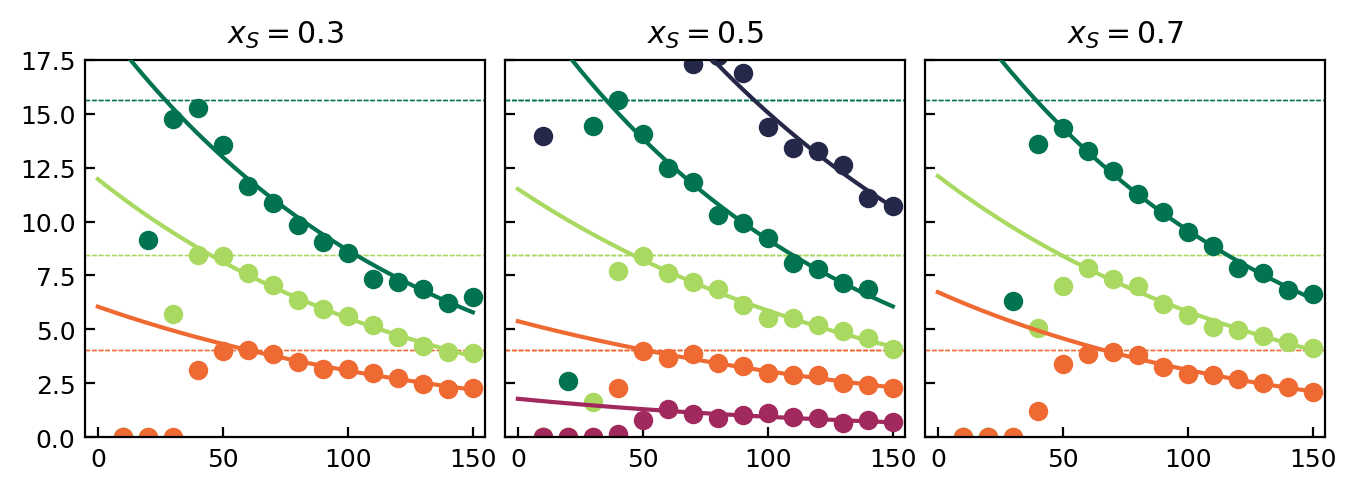

In [17]:
# Set up the plot
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(8, 2.5))
axInd = 0

# We want to store the fit coefficients
lista = []
listb = []
fitPar = []

max3 = 0
max5 = 0
max7 = 0

mylw = 0.45
myls = '--'

# Let’s separate each data set by PeR and xS then fit each to an exponential
for i in xrange(len(distxA)):
    for j in xrange(len(distPeR)):
        peS = []
        diff = []
        logDiff = []

        for k in xrange(numFiles):
            # Compute the difference
            compDiff = (SS['Dense_B'][k] - SS['Dense_A'][k])
            # Get the max difference for each activity ratio
            if params['peR'][k] == 0.3 and compDiff > max3:
                max3 = compDiff
            if params['peR'][k] == 0.5 and compDiff > max5:
                max5 = compDiff
            if params['peR'][k] == 0.7 and compDiff > max7:
                max7 = compDiff

            if params['xA'][k] == distxA[i] and params['peR'][k] == distPeR[j]:
                peS.append(params['peA'][k])
                diff.append(compDiff)
                try:
                    logDiff.append(math.log(diff[-1]))
                except:
                    logDiff.append(1)

        # Only try to fit data that exists
        if logDiff:
            # Find the first index to fit (maximum value)
            absDiff = 0
            peakInd = 0
            # Can’t be first or last value
            for k in range(1, len(logDiff) - 1):
                tmp = (diff[k] - diff[k-1]) + (diff[k] - diff[k+1])
                if tmp > absDiff and diff[k-1] < diff[k] and diff[k+1] < diff[k]:
                    absDiff = tmp
                    peakInd = k

            # Now fit the data:
            b, fittmp = curve_fit(myLine, peS[peakInd:], logDiff[peakInd:])[0]
            a = math.e ** fittmp
            lna = math.log(a)

            # Now let’s plot our line with the original data
            oxs = np.arange(0, 150, 0.001)
            oys = np.zeros_like(oxs)
            for k in xrange(len(oxs)):
                oys[k] = a * math.e ** (b * oxs[k])

            # Add maximum values as horizontal line on each plot:
            ax[axInd].axhline(y=max3, color=getCol(0.3), lw=mylw, linestyle=myls, zorder=1)
            ax[axInd].axhline(y=max5, color=getCol(0.5), lw=mylw, linestyle=myls, zorder=1)
            ax[axInd].axhline(y=max7, color=getCol(0.7), lw=mylw, linestyle=myls, zorder=1)
            # Plot the fitted data
            ax[axInd].scatter(peS, diff, c=getCol(distPeR[j]), zorder=2)
            ax[axInd].plot(oxs, oys, c=getCol(distPeR[j]), lw=1.5, zorder=3)

            # Store ‘a’ and ‘b’
            lista.append(a)
            listb.append(b)
            fitPar.append((distxA[i], distPeR[j]))

    # Set some parameters for each of three plots
    ax[axInd].set_title(r'$x_{S}=$' + str(distxA[i]/100.0))
    ax[axInd].set_xlim(-5, 155)
    ax[axInd].set_ylim(0, 17.5)
    axInd += 1

plt.subplots_adjust(wspace=.05, hspace=0.02)

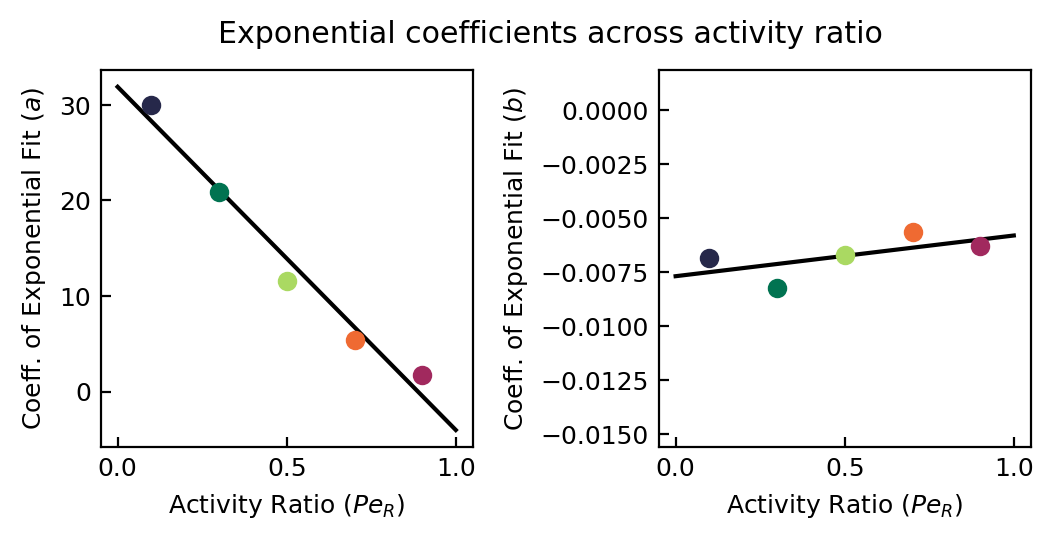

In [19]:
# Now let’s plot the coefficient of the exponential (get it in functional form)
from scipy.stats import linregress
fig, ax = plt.subplots(1, 2, figsize=(6, 2.5))

fitx = []
fity1 = []
fity2 = []

# First we’ll ignore particle fraction (only xS=0.5)
for i in xrange(len(lista)):
    if fitPar[i][0] == 50.0:
        ax[0].scatter(fitPar[i][1], lista[i], c=getCol(fitPar[i][1]), zorder=2)
        ax[1].scatter(fitPar[i][1], listb[i], c=getCol(fitPar[i][1]), zorder=2)
        fitx.append(fitPar[i][1])
        fity1.append(lista[i])
        fity2.append(listb[i])

# Get our fit overlaid:
m1, b1, r1, p1, sig1 = linregress(fitx, fity1)
m2, b2, r2, p2, sig2 = linregress(fitx, fity2)
evalX = np.arange(0, 1.0, 0.001)
evalY1 = []
evalY2 = []
# Define a line to plot
def linFit(mm, xx, bb):
    return mm * xx + bb
# Evaluate and plot
for i in xrange(len(evalX)): evalY1.append(linFit(m1, evalX[i], b1))
ax[0].plot(evalX, evalY1, lw=1.5, c='k', zorder=1)
for i in xrange(len(evalX)): evalY2.append(linFit(m2, evalX[i], b2))
ax[1].plot(evalX, evalY2, lw=1.5, c='k', zorder=1)

# Axis parameters
fig.suptitle('Exponential coefficients across activity ratio')
ax[0].set_xlabel(r'Activity Ratio $(Pe_{R})$')
ax[0].set_ylabel(r'Coeff. of Exponential Fit $(a)$')
ax[1].set_xlabel(r'Activity Ratio $(Pe_{R})$')
ax[1].set_ylabel(r'Coeff. of Exponential Fit $(b)$')
plt.subplots_adjust(wspace=.5, hspace=0.02)

In [ ]:
# Let's try net activity
netAct = []
denseDiff = []
for i in xrange(numFiles):
    netAct.append(theoryDenom(params['xA'][i], params['peA'][i], params['peB'][i]))
    denseDiff.append(SS['Dense_B'][i] - SS['Dense_A'][i])

# plt.scatter(netAct, SS['Dense_tot'])
# plt.scatter(netAct, SS['Dense_A'])
# plt.scatter(netAct, SS['Dense_B'])
plt.scatter(netAct, denseDiff)
# plt.ylim(50, 100)


In [ ]:
################################## Percent in gas phase ######################################
# SS

# vs time

In [ ]:
# Largest cluster ############################################################################
# SS
# SS
for i in xrange(numFiles):
    plt.scatter(params['peA'][i], SS['Lg_clust'][i], c='#0029FF')
    
plt.xlabel(r'Slow Activity $\left( Pe_{S} \right)$')
plt.xlim(0, 150.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(0, 100)
ax = plt.gca()
minorLocator = MultipleLocator(5.0)
ax.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2.5)
ax.yaxis.set_minor_locator(minorLocator)
plt.show()

# vs time
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label="" + str(params['peA'][i]) + ", " + str(params['peB'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.60, -0.25), title=r'$Pe_{S}, \ Pe_{F}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(0, 100)
ax = plt.gca()
minorLocator = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)
plt.title('Normal Axes')
plt.show()

# at longer times...
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label="" + str(params['peA'][i]) + ", " + str(params['peB'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.60, -0.25), title=r'$Pe_{S}, \ Pe_{F}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(0, 100)
ax = plt.gca()
minorLocator = MultipleLocator(10)
ax.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minorLocator)
plt.title('Normal Axes')
plt.show()

# Now let's use some log axes...
# Short
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label="" + str(params['peA'][i]) + ", " + str(params['peB'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.60, -0.25), title=r'$Pe_{S}, \ Pe_{F}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 1.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(0, 100)
ax = plt.gca()
plt.title('Log-log Axes, time < 1')
plt.show()

# 10^-4 through 10^-1
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label="" + str(params['peA'][i]) + ", " + str(params['peB'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.60, -0.25), title=r'$Pe_{S}, \ Pe_{F}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-4, 10**-1)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-2 / 2, 50)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
plt.show()

# 10^-2 through 10^0
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label="" + str(params['peA'][i]) + ", " + str(params['peB'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.60, -0.25), title=r'$Pe_{S}, \ Pe_{F}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-2, 10**0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-2, 100)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-2} \leq \tau_{B} \leq 10^{0}$')
plt.show()

# Long
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label="" + str(params['peA'][i]) + ", " + str(params['peB'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.60, -0.25), title=r'$Pe_{S}, \ Pe_{F}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(-5, 100.0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(0, 100)
ax = plt.gca()
plt.title('Log-log Axes, All Data')
plt.show()

In [ ]:
# Get correct indices for each regime
indices = []
for i in xrange(numFiles):
    tmp = []
    for j in xrange(len(all_sims[i]['Timestep'])):
        if 0.99*10**-4 <= all_sims[i]['Timestep'][j] / params['brownTime'][i] <= 1.01*10**-4:
            tmp.append(j)
        if 0.99*10**-3 <= all_sims[i]['Timestep'][j] / params['brownTime'][i] <= 1.01*10**-3:
            tmp.append(j)
        if 0.99*10**-1 <= all_sims[i]['Timestep'][j] / params['brownTime'][i] <= 1.01*10**-1:
            tmp.append(j)
    indices.append(tmp)

# # Check the index picking... it's fine
# for i in xrange(numFiles):
#     print("Regime one start: {}").format(all_sims[i]['Timestep'][indices[i][0]] / params['brownTime'][i])
#     print("Regime two start: {}").format(all_sims[i]['Timestep'][indices[i][1]] / params['brownTime'][i])
#     print("Regime three start: {}").format(all_sims[i]['Timestep'][indices[i][2]] / params['brownTime'][i])
    
# Fit each regime separately
# First 10^-4 through 10^-3
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-4, 10**-3)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-2, 5*10**-1)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-3}$')

# Let's just fit regime 1...
mRegOne = []
for i in xrange(numFiles):
    # Regime 1
    # Time data
    x1 = (all_sims[i]['Timestep'][indices[i][0]:indices[i][1]] / params['brownTime'][i])
    # Largest cluster data
    y1 = (all_sims[i]['Lg_clust'][indices[i][0]:indices[i][1]] * 100.0 / params['partAll'][i])
    popt, pcov = curve_fit(loglogStraight, x1, y1)
    plt.loglog(x1, loglogStraight(x1, *popt),
               label='fit PeR=' + str(params['peR'][i]) + ': b=%5.3f' % (popt[1]))
    mRegOne.append(popt[1])
# plt.legend(loc = 4, bbox_to_anchor=(1.8, -0.15))
plt.show()

# Then 10^-3 through 10^-1
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-3, 10**-1)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-1, 10**2)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-3} \leq \tau_{B} \leq 10^{-1}$')

# Let's just fit regime 2...
mRegTwo = []
for i in xrange(numFiles):
    # Regime 1
    # Time data
    x2 = (all_sims[i]['Timestep'][indices[i][1]:indices[i][2]] / params['brownTime'][i])
    # Largest cluster data
    y2 = (all_sims[i]['Lg_clust'][indices[i][1]:indices[i][2]] * 100.0 / params['partAll'][i])
    popt, pcov = curve_fit(loglogStraight, x2, y2)
    plt.loglog(x2, loglogStraight(x2, *popt),
               label='fit PeR=' + str(params['peR'][i]) + ': b=%5.3f' % (popt[1]))
    mRegTwo.append(popt[1])
# plt.legend(loc = 4, bbox_to_anchor=(1.8, -0.15))
plt.show()

# Let's combine the regimes and look at the fit:
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
# plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-4, 10**-1)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-2, 10**2)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')

# Let's just fit regime 2...
mRegComb = []
for i in xrange(numFiles):
    # Combine regimes
    # Time data
    x3 = (all_sims[i]['Timestep'][indices[i][0]:indices[i][2]] / params['brownTime'][i])
    # Largest cluster data
    y3 = (all_sims[i]['Lg_clust'][indices[i][0]:indices[i][2]] * 100.0 / params['partAll'][i])
    popt, pcov = curve_fit(loglogStraight, x3, y3)
    plt.loglog(x3, loglogStraight(x3, *popt),
               label='fit PeR=' + str(params['peR'][i]) + ': b=%5.3f' % (popt[1]))
    mRegComb.append(popt[1])
# plt.legend(loc = 4, bbox_to_anchor=(1.8, -0.15))
plt.show()

# Plot slope fit for regime 1
# plt.plot(params['peR'], mRegOne)
# plt.show()
# Compute average slope regime 1
regOneAvg = np.mean(mRegOne)
print("Slope of regime 1: {}").format(regOneAvg)

# Plot slope fit for regime 2
# plt.plot(params['peR'], mRegTwo)
# plt.show()
# Compute average slope regime 1
regTwoAvg = np.mean(mRegTwo)
print("Slope of regime 2: {}").format(regTwoAvg)

# Plot slope fit for both
plt.plot(params['peR'], mRegComb)
plt.show()
# Compute average slope both
regBothAvg = np.mean(mRegComb)
print("Slope of both: {}").format(regBothAvg)

# What if I compute the difference of the slopes
diffSlopes = []
for i in xrange(numFiles):
    diffSlopes.append(mRegOne[i] - mRegTwo[i])
# plt.plot(params['peR'], diffSlopes)
# plt.show()

# Linear regression inverse time weighting


In [ ]:
# Let's put lines on this bitch
# 10^-4 through 10^-1
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-4, 10**-1)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**-1 / 5, 250)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
# plt.show()

# Get x data, evaluate function, plot line
xs = np.arange(1.5*10**-4, 7*10**-4, 10**-4)
ys = np.zeros_like(xs)
for i in xrange(len(xs)):
    ys[i] = linearRel(1.25, xs[i], 10**3.5) 
plt.loglog(xs, ys)

xs = np.arange(2*10**-3, 5*10**-2, 10**-3)
ys = np.zeros_like(xs)
for i in xrange(len(xs)):
    ys[i] = linearRel(1.0, xs[i], 10**1.5) 
plt.loglog(xs, ys)

plt.show()

In [ ]:
%%capture
# Let's throw some lines on this data (and maybe normalize it)

# First let's go through and get the nucleation time
percThresh = 5
nucTime = []
for i in xrange(numFiles):
    for j in xrange(len(all_sims[i]['Lg_clust'])):
        curPerc = all_sims[i]['Lg_clust'][j] * 100.0 / float(params['partAll'][i])
        if curPerc >= percThresh:
            nucTime.append(all_sims[i]['Timestep'][j])
            break

reNorm = min(nucTime)
normNucTime = []
for i in xrange(numFiles):
    normNucTime.append(nucTime[i]/float(reNorm))
    
plt.plot(params['peR'], normNucTime)
plt.xlabel(r'Activity Ratio $\left( \frac{Pe_{slow}}{Pe_{fast}} \right)$')
plt.ylabel('Renormalization Constant')
plt.show()

# Now let's use this to normalize largest cluster relationship
# 10^-4 through 10^-1
for i in xrange(numFiles):
    plt.loglog(all_sims[i]['Timestep'] / params['brownTime'][i] / normNucTime[i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-5, 10**0)
plt.ylabel(r'$\%$ in Largest Cluster')
# plt.ylim(10**-1 / 5, 100)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
plt.show()

# Method two: just subtract the difference in nucleation time
subtractNuc = []
for i in xrange(numFiles):
    subtractNuc.append(nucTime[i] - reNorm)

# Subtract nucleation time
for i in xrange(numFiles):
    plt.loglog((all_sims[i]['Timestep'] - subtractNuc[i]) / params['brownTime'][i],
             all_sims[i]['Lg_clust'] * 100.0 / params['partAll'][i],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(10**-5, 10**0)
plt.ylabel(r'$\%$ in Largest Cluster')
plt.ylim(10**0, 100)
ax = plt.gca()
plt.title(r'Log-log Axes, $10^{-4} \leq \tau_{B} \leq 10^{-1}$')
plt.show()
    

In [ ]:
# Mean Cluster Size ##########################################################################
# SS

# vs time

In [ ]:
# Diameter: ALL, AA, AB, BB ##################################################################
# SS
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'] / params['brownTime'][i],
             all_sims[i]['sigALL'],
             label=str(params['peR'][i]))
plt.legend(loc = 4, bbox_to_anchor=(1.35, -0.15), title=r'$Pe_{R}$')
plt.xlabel(r'Brownian Time $(\tau_{B})$')
plt.xlim(0, 100.0)
plt.ylabel(r'Particle Diameter $(\sigma_{int})$')
plt.ylim(0.995, 1.005)
ax = plt.gca()
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(0.001)
ax.yaxis.set_minor_locator(minorLocator)
plt.title('Normal Axes')
plt.show()

# vs time

In [ ]:
# Largest cluster area #######################################################################
# SS

# vs time

In [ ]:
# Largest cluster density ####################################################################
# SS

# vs time